# Работа с временными признаками

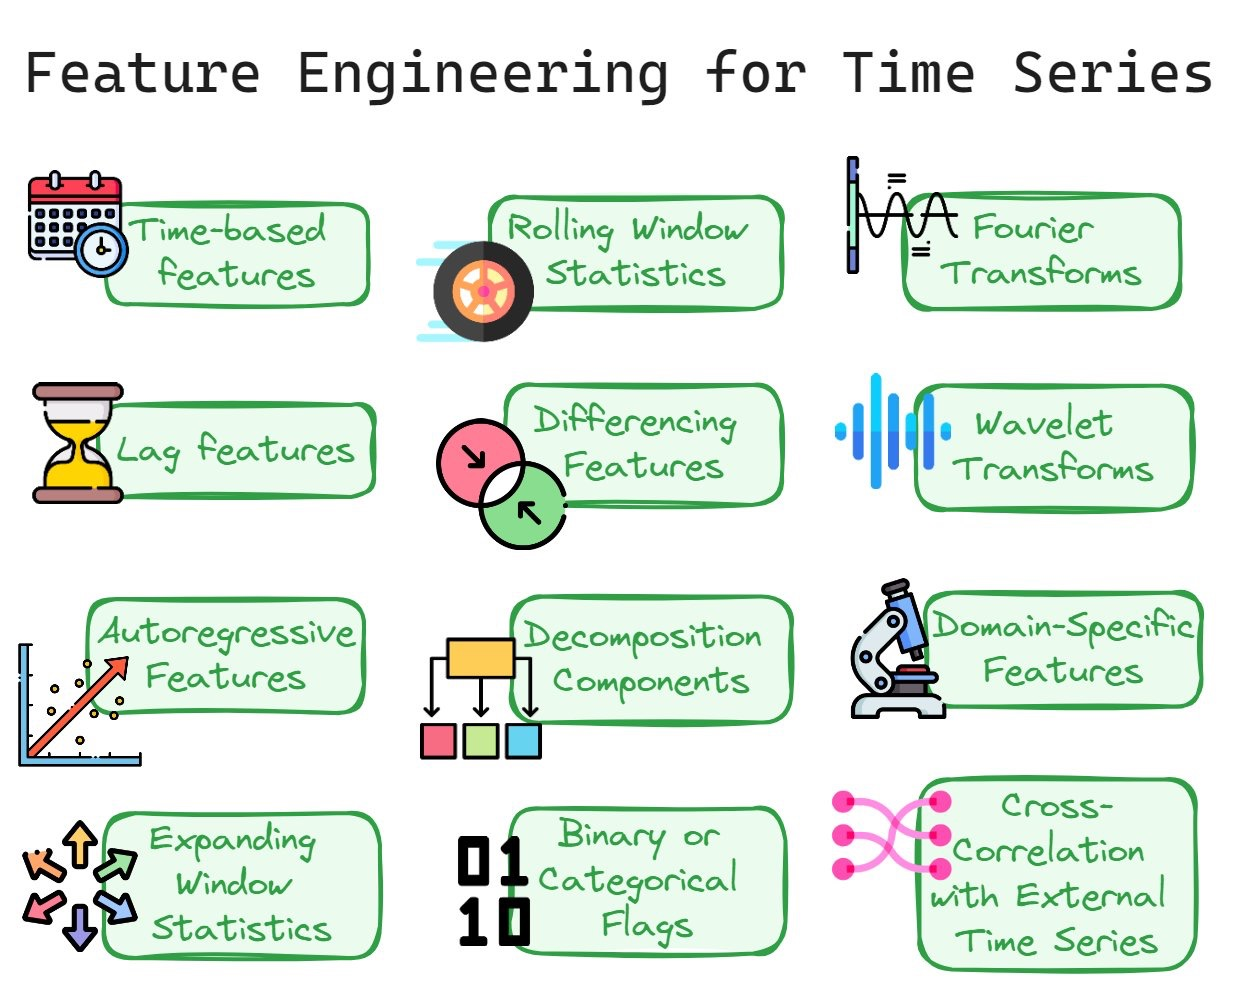

Временные метки могут быть отличным источником полезных признаков для моделей машинного обучения, так как они часто содержат скрытые закономерности, связанные с сезонностью, суточными циклами, днями недели и другими факторами. Вот основные подходы и признаки, которые можно извлечь из временных меток:

**1. Базовые признаки даты и времени**

* Год (Year): Может быть полезным, если данные охватывают несколько лет и в них есть тенденции или изменения со временем.
Месяц (Month): Часто используется в задачах с сезонностью, например, в продажах, туризме и т. д.

* День месяца (Day): Полезен в задачах, связанных с конкретными днями месяца, например, в периодах высокой нагрузки (в начале и конце месяца).

* День недели (Day of Week): Применяется, когда поведение зависит от дня недели, например, различия между выходными и будними днями.

* Час (Hour): Суточные колебания важны в таких задачах, как анализ спроса, посещаемости, активности пользователей и т. д.

* Минута и секунда (Minute, Second): Обычно используются для высокочастотных данных, когда важен временной интервал в пределах часа (например, в финансовых или IoT-данных).

**2. Бинарные признаки**

Эти признаки показывают, принадлежит ли временная метка определенной категории:

* Признак выходного дня (Is Weekend): Бинарный признак, указывающий, является ли день выходным (суббота или воскресенье).

* Признак праздника (Is Holiday): Может указывать, приходится ли дата на праздничный день. Данные о праздниках могут быть загружены для конкретной страны или региона.

* Час пик (Is Rush Hour): Может быть полезен в транспортных данных или в задачах, связанных с пиковыми периодами нагрузки (утро и вечер в будни).

**3. Сезонные признаки**

* Сезон (Season): Признак, указывающий сезон (зима, весна, лето, осень). Особенно полезен в задачах с погодой или данными о сельском хозяйстве.

* Квартал года (Quarter): Годовой квартал (1, 2, 3 или 4), что может быть полезно в данных, где квартальные отчеты или циклы важны, например, в финансовом секторе.

**4. Циклические признаки**

* Некоторые признаки (например, день недели, месяц, час) имеют циклический характер. Для их корректного представления можно использовать синус и косинус, чтобы модель правильно учитывала цикличность.

* Признаки синус и косинус: Это преобразование важно, поскольку, например, за 23:00 идет 0:00, и разница между ними по циклу должна быть минимальной.

```
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
```

**5. Признаки временного интервала**

* Прошло времени с начала (Time Since Start): Показывает, сколько времени прошло с начала определенного периода. Например, сколько дней прошло с начала года.

* Прошло времени с последнего события (Time Since Last Event): Важно в задачах, где нужно учитывать, когда произошло предыдущее событие. Например, как давно клиент посещал магазин.

**6. Скользящие и агрегированные статистики**

На основе временных меток можно создать статистику по предыдущим или будущим периодам, особенно полезную в задачах прогнозирования:

* Среднее значение за период (Rolling Mean): Среднее значение целевой переменной за последние n дней или часов.

* Сумма за период (Rolling Sum): Сумма значений целевой переменной за определенный временной промежуток.

* Максимум и минимум за последние n дней или часов.
Эти признаки используются для сглаживания данных и выявления общих тенденций.

**7. Тренд и сезонность**

Если у вас есть временные ряды, можно извлечь компоненты тренда и сезонности. Эти признаки особенно важны для задач прогнозирования временных рядов. Компоненты тренда и сезонности могут быть выделены с помощью таких методов, как декомпозиция STL (Seasonal-Trend decomposition using Loess).

**8. Показатель активности**

* События в течение определенного периода: Подсчет количества событий за определенные периоды. Например, количество покупок пользователя за последнюю неделю.

* Среднее время между событиями: Например, среднее время между посещениями пользователя. Это помогает понять частоту взаимодействия.


In [ ]:


# Пример данных
df = pd.DataFrame({
    'timestamp': pd.to_datetime(['2023-01-01 14:30:00', '2023-07-04 09:00:00', '2023-12-25 18:45:00'])
})

# Извлечение базовых признаков
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour

# Бинарные признаки
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # Суббота и воскресенье
df['is_holiday'] = df['timestamp'].dt.strftime('%m-%d').isin(['01-01', '07-04', '12-25']).astype(int)  # Пример праздников

# Циклические признаки
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

df

timestamp  year  month  day  day_of_week  hour  is_weekend  \
0 2023-01-01 14:30:00  2023      1    1            6    14           1   
1 2023-07-04 09:00:00  2023      7    4            1     9           0   
2 2023-12-25 18:45:00  2023     12   25            0    18           0   

   is_holiday  hour_sin      hour_cos     month_sin  month_cos  
0           1 -0.500000 -8.660254e-01  5.000000e-01   0.866025  
1           1  0.707107 -7.071068e-01 -5.000000e-01  -0.866025  
2           1 -1.000000 -1.836970e-16 -2.449294e-16   1.000000

### Литература

* James D Hamilton, Time Series Analysis, 1994
Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс

* Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов, Учеб. пособие. М.: Финансы и статистика, 2003 г. - 416 с: ил., главы 1,4,5,7.

* Jonathan D. Cryer, Kung-Sik Chan, Time Series Analysis With Applications in R. Second Edition. Springer

* Bollerslev, Tim (1992). "ARCH Modeling in Finance: A Review of the Theory and Empirical Evidence". Journal of Econometrics. 52 (1–2): 5–59.

# Работа с геопризнаками

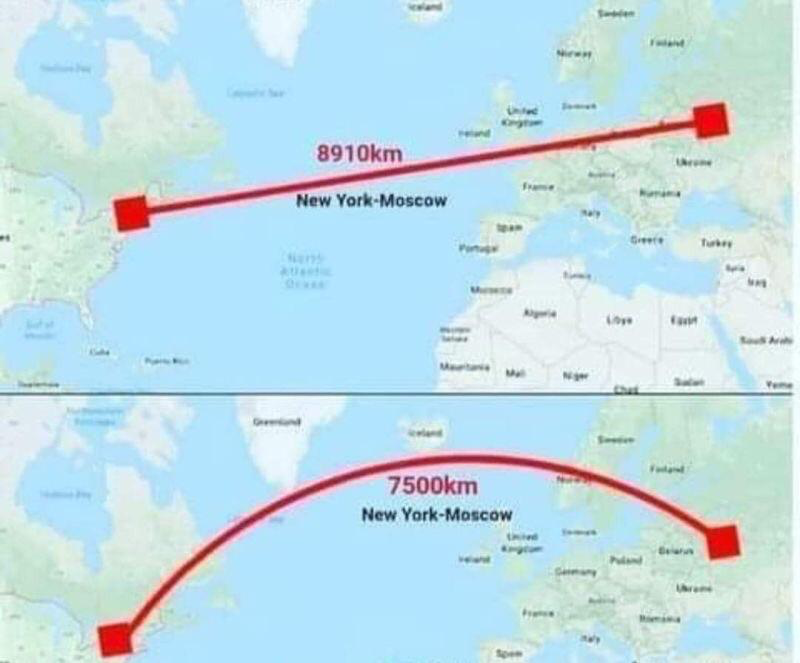

Извлечение информативных признаков из географических координат (широта и долгота) — важная задача в машинном обучении, особенно в задачах, связанных с пространственными данными (например, в предсказаниях в ритейле, анализе пользователей и геомаркетинге). Давай рассмотрим основные методы, которые помогают извлекать полезные признаки из координат.

**1. Признаки расстояния**

Расстояние до определенных точек:

* Рассчитать расстояние от каждой точки до известных местоположений, таких как центр города, ближайший аэропорт или место конкурентов. Это можно сделать с помощью формулы Харверсина или встроенных функций библиотек (например, GeoPy).

* Расстояние между точками: Если объекты распределены по географии (например, магазины, офисы), можно рассчитать расстояние между ними, чтобы выявить кластеры и зоны высокой плотности.

**2. Кластеризация с помощью координат**

* Кластеризация методом K-средних: Применение алгоритма KMeans к широте и долготе позволяет разделить объекты на кластеры, представляющие географические регионы. Результат будет особенно полезен для создания категорий по расположению.

* DBSCAN: Подходит для выявления плотных кластеров в данных. Например, можно найти группы точек (точки интереса, магазины) в зонах высокой плотности и добавить в модель признак принадлежности к кластеру.

**3. Признаки сетки (grid features)**

* Квадратная сетка: Разделение всей территории на ячейки фиксированного размера (например, 0.1° × 0.1°). Каждой точке присваивается категория, соответствующая ее ячейке. Такой метод позволяет легко учитывать региональные различия в модели.

* Географическая сетка H3: H3 – это геокодировочная система, которая делит Землю на шестиугольники разного размера. Этот метод удобен для создания признаков на основе принадлежности точки к определенной ячейке и учитывает географические расстояния.

**4. Признаки на основе расстояния и направления**

* Азимут (угол направления): Если важно направление от одной точки к другой, можно вычислить азимут — угол направления относительно северного полюса. Этот признак может помочь, например, в анализе маршрутов.

* Векторные признаки: Широту и долготу можно разложить на синус и косинус для создания векторных признаков. Это полезно для задач, где важно направление, особенно при анализе дорожных данных.

**5. Координаты с привязкой к времени**

* Временные признаки: Для задач, где данные зависят от времени (например, частота посещений по дням недели), можно добавить временные признаки. Например, широта-долгота-день недели или широта-долгота-время суток позволяют учитывать временные закономерности в пространственных данных.

* Тепловая карта по времени: Анализ плотности координат в зависимости от времени (например, плотность поездок такси в час пик).

**6. Региональные признаки**

* Кодирование адресов и административных границ: Преобразование широты и долготы в почтовые индексы, районы или другие административные зоны. Примером может быть использование обратного геокодирования для получения региона или типа зоны (жилой район, коммерческая зона).

* Социально-демографические признаки региона: Можно дополнительно загрузить статистические данные для районов (доходы, население, инфраструктура) и присвоить эти данные точкам в зависимости от их местоположения.

**7. Топографические признаки**

* Высота над уровнем моря: Если для задачи важны особенности рельефа, то можно извлечь высоту над уровнем моря.

* Тип рельефа или покрытия: Использование данных о типе местности (город, сельская местность, пустыня, лес). Такие данные можно добавить с использованием карт или спутниковых данных.

**8. Координаты как точка на сфере**

* Полярные координаты: Можно рассматривать широту и долготу как точки на сфере и создавать полярные признаки. Например, если данные относятся к глобальному масштабу, это может быть более корректным представлением, чем простое использование евклидовых расстояний.

* Трансформация в метрическую систему: Преобразование географических координат в метры по отношению к определенной точке. Это удобно, если данные сосредоточены в пределах небольшого региона и важно точное расстояние.

In [ ]:
import pandas as pd
import numpy as np
import os
%matplotlib inline

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

## Пример использования нескольких методов в Python

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from geopy.distance import geodesic # геодезическое расстояние между точками по поверхности Земли

# Пример данных
data = pd.DataFrame({
    'latitude': [55.751244, 55.755826, 59.934280],
    'longitude': [37.618423, 37.617635, 30.335098]
})

# Расстояние до центра Москвы
moscow_center = (55.751244, 37.618423)
data['distance_to_moscow_center'] = data.apply(lambda row: geodesic((row['latitude'], row['longitude']), moscow_center).km, axis=1)

# Кластеризация K-средних
kmeans = KMeans(n_clusters=2)
data['cluster'] = kmeans.fit_predict(data[['latitude', 'longitude']])

# Признаки синус-косинус для направления
data['lat_sin'] = np.sin(np.radians(data['latitude']))
data['lat_cos'] = np.cos(np.radians(data['latitude']))
data['lon_sin'] = np.sin(np.radians(data['longitude']))
data['lon_cos'] = np.cos(np.radians(data['longitude']))

data

latitude  longitude  distance_to_moscow_center  cluster   lat_sin  \
0  55.751244  37.618423                   0.000000        0  0.826602   
1  55.755826  37.617635                   0.512541        0  0.826647   
2  59.934280  30.335098                 635.035105        1  0.865451   

    lat_cos   lon_sin   lon_cos  
0  0.562787  0.610400  0.792093  
1  0.562721  0.610389  0.792102  
2  0.500993  0.505056  0.863086

## Пример работы с реальным датасетом

In [16]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=15aOt64uBnVxnc9owPrEtFZEsfmTwZG5G' -O california.zip

--2024-11-09 06:37:19--  https://drive.google.com/uc?export=download&id=15aOt64uBnVxnc9owPrEtFZEsfmTwZG5G
Resolving drive.google.com (drive.google.com)... 173.194.217.102, 173.194.217.138, 173.194.217.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.217.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=15aOt64uBnVxnc9owPrEtFZEsfmTwZG5G&export=download [following]
--2024-11-09 06:37:19--  https://drive.usercontent.google.com/download?id=15aOt64uBnVxnc9owPrEtFZEsfmTwZG5G&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 409382 (400K) [application/octet-stream]
Saving to: ‘california.zip’

california.zip      100%[===================>] 399.79K  --.-K

In [17]:
!unzip california.zip -d /content

Archive:  california.zip
  inflating: /content/housing.csv    


In [18]:
import pandas as pd
import numpy as np
df = pd.read_csv("housing.csv")

df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [ ]:
a = set(df['ocean_proximity'])

In [ ]:
print(a)

{'NEAR BAY', 'INLAND', 'NEAR OCEAN', '<1H OCEAN', 'ISLAND'}


longitude: A measure of how far west a house is; a higher value is farther west

latitude: A measure of how far north a house is; a higher value is farther north

housingMedianAge: Median age of a house within a block; a lower number is a newer building

totalRooms: Total number of rooms within a block

totalBedrooms: Total number of bedrooms within a block

population: Total number of people residing within a block

households: Total number of households, a group of people residing within a home unit, for a block

medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

medianHouseValue: Median house value for households within a block (measured in US Dollars)

oceanProximity: Location of the house w.r.t ocean/sea

Посмотрим на распределения признаков

In [ ]:
numerical_features=list(df.columns)
numerical_features.remove('ocean_proximity')
numerical_features.remove('median_house_value')
print(numerical_features)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>, <Axes: >]],
      dtype=object)

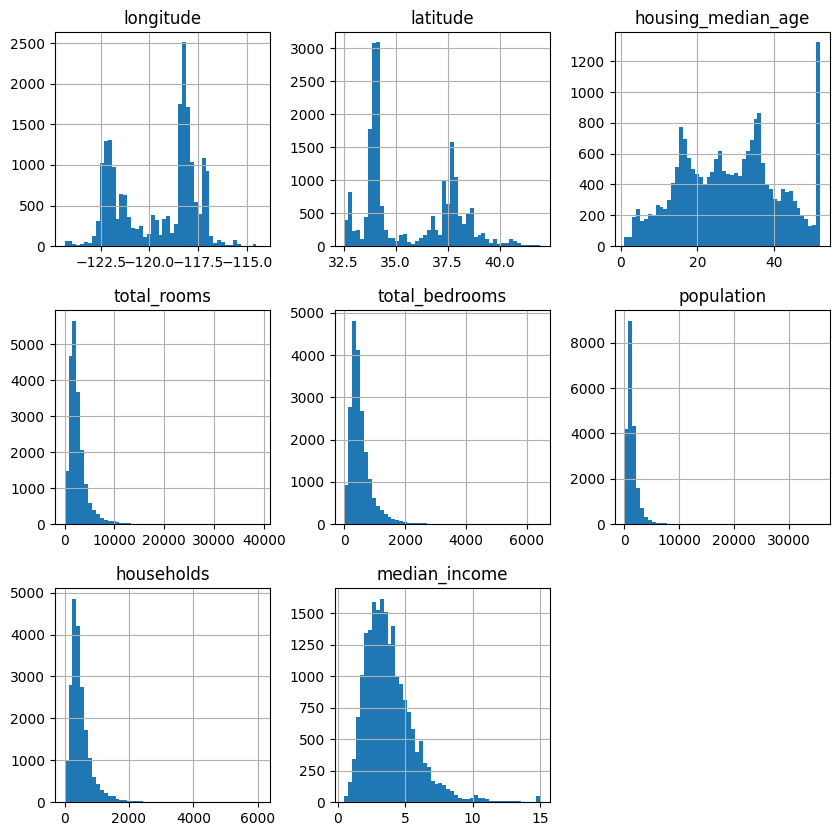

In [ ]:
df[numerical_features].hist(bins=50, figsize=(10, 10))

Прологарифмируем скошенные по распределению признаки

In [ ]:
skewed_features=['households','median_income','population', 'total_bedrooms', 'total_rooms']

log_numerical_features=[]

for f in skewed_features:
    df[f + '_log']=np.log1p(df[f])
    log_numerical_features.append(f + '_log')

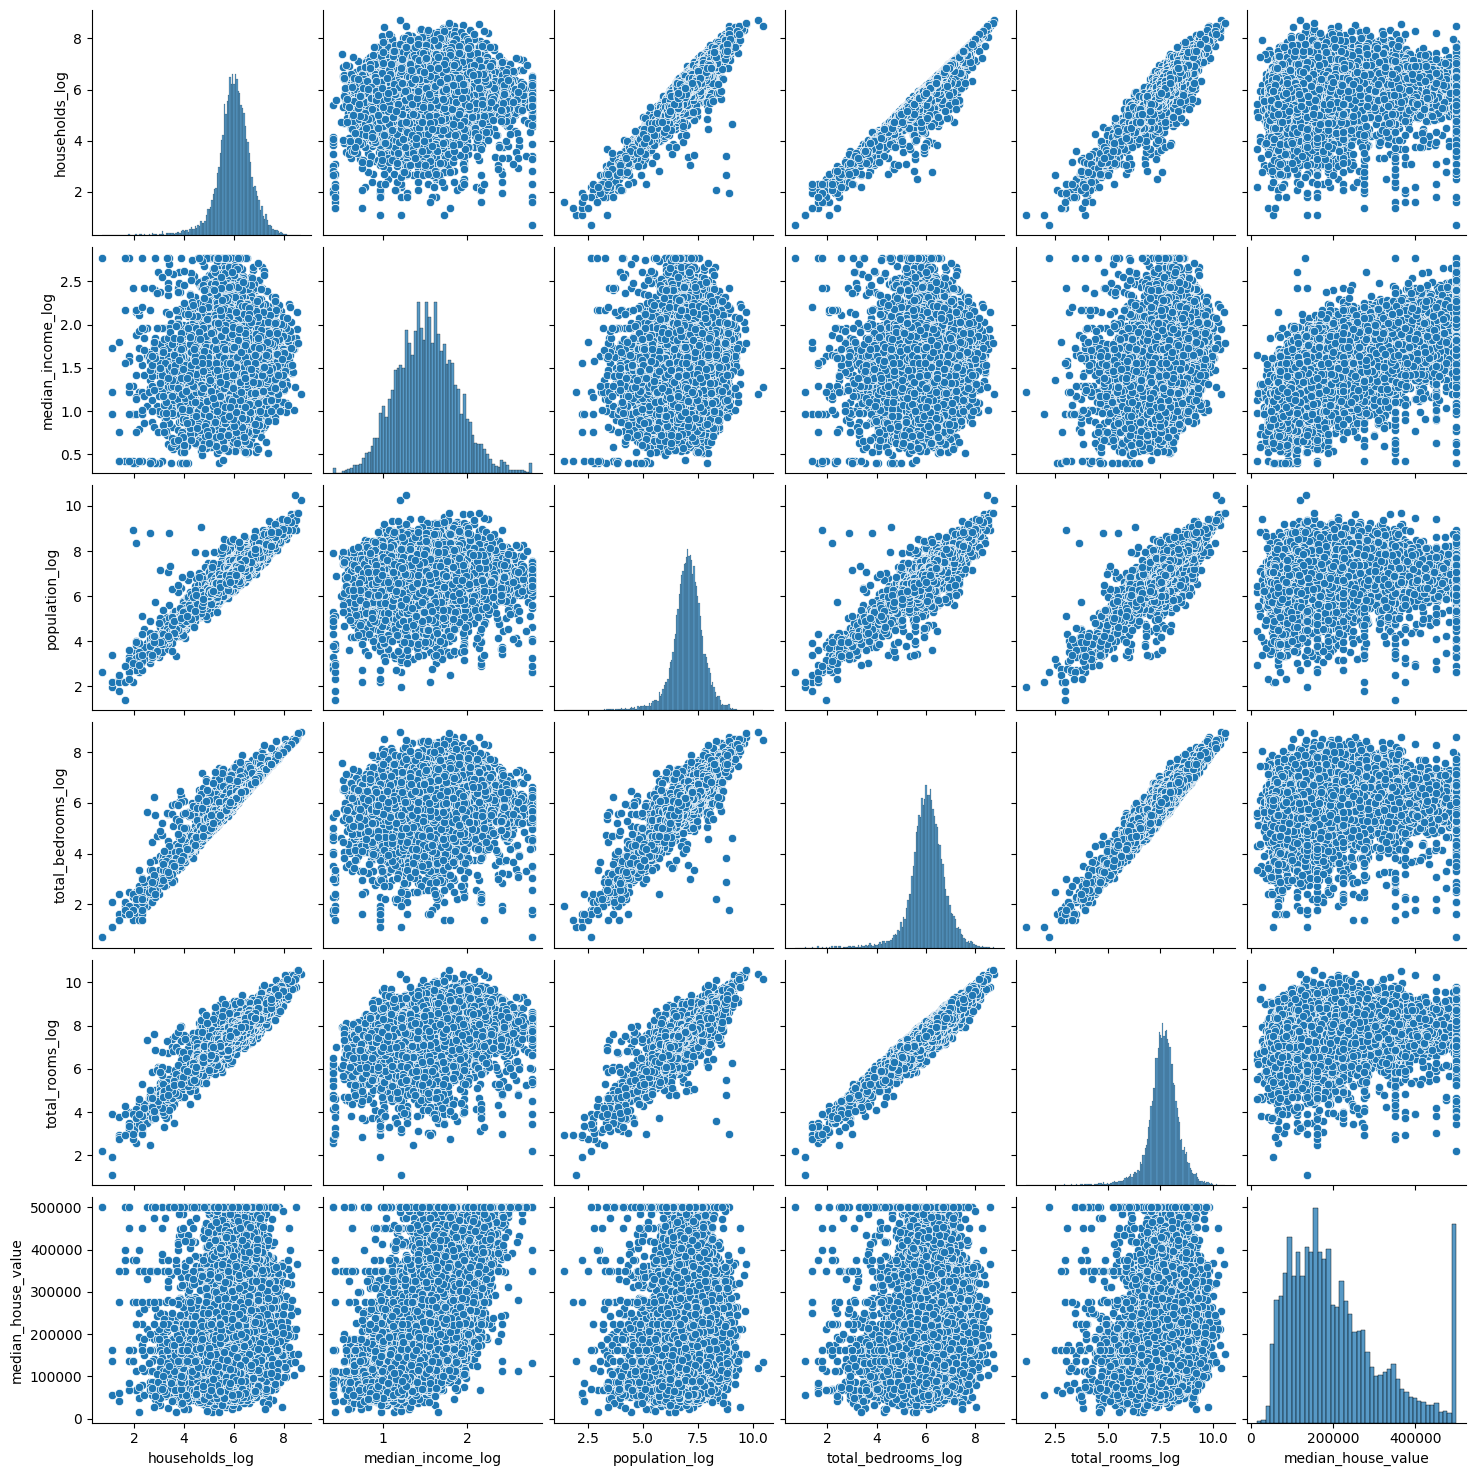

In [ ]:
# pairplot
import seaborn as sns

sns.pairplot(df[log_numerical_features+['median_house_value']])

### Разбиение на группы по близости к точке интереса (аэропорт, вокзал, крупный ТЦ и тд)

Data points within threshold: 635


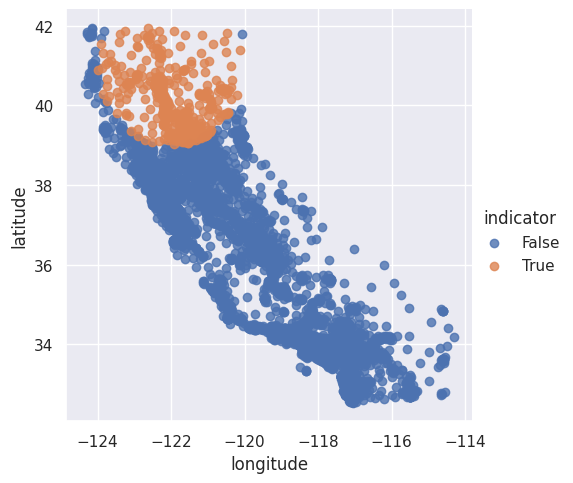

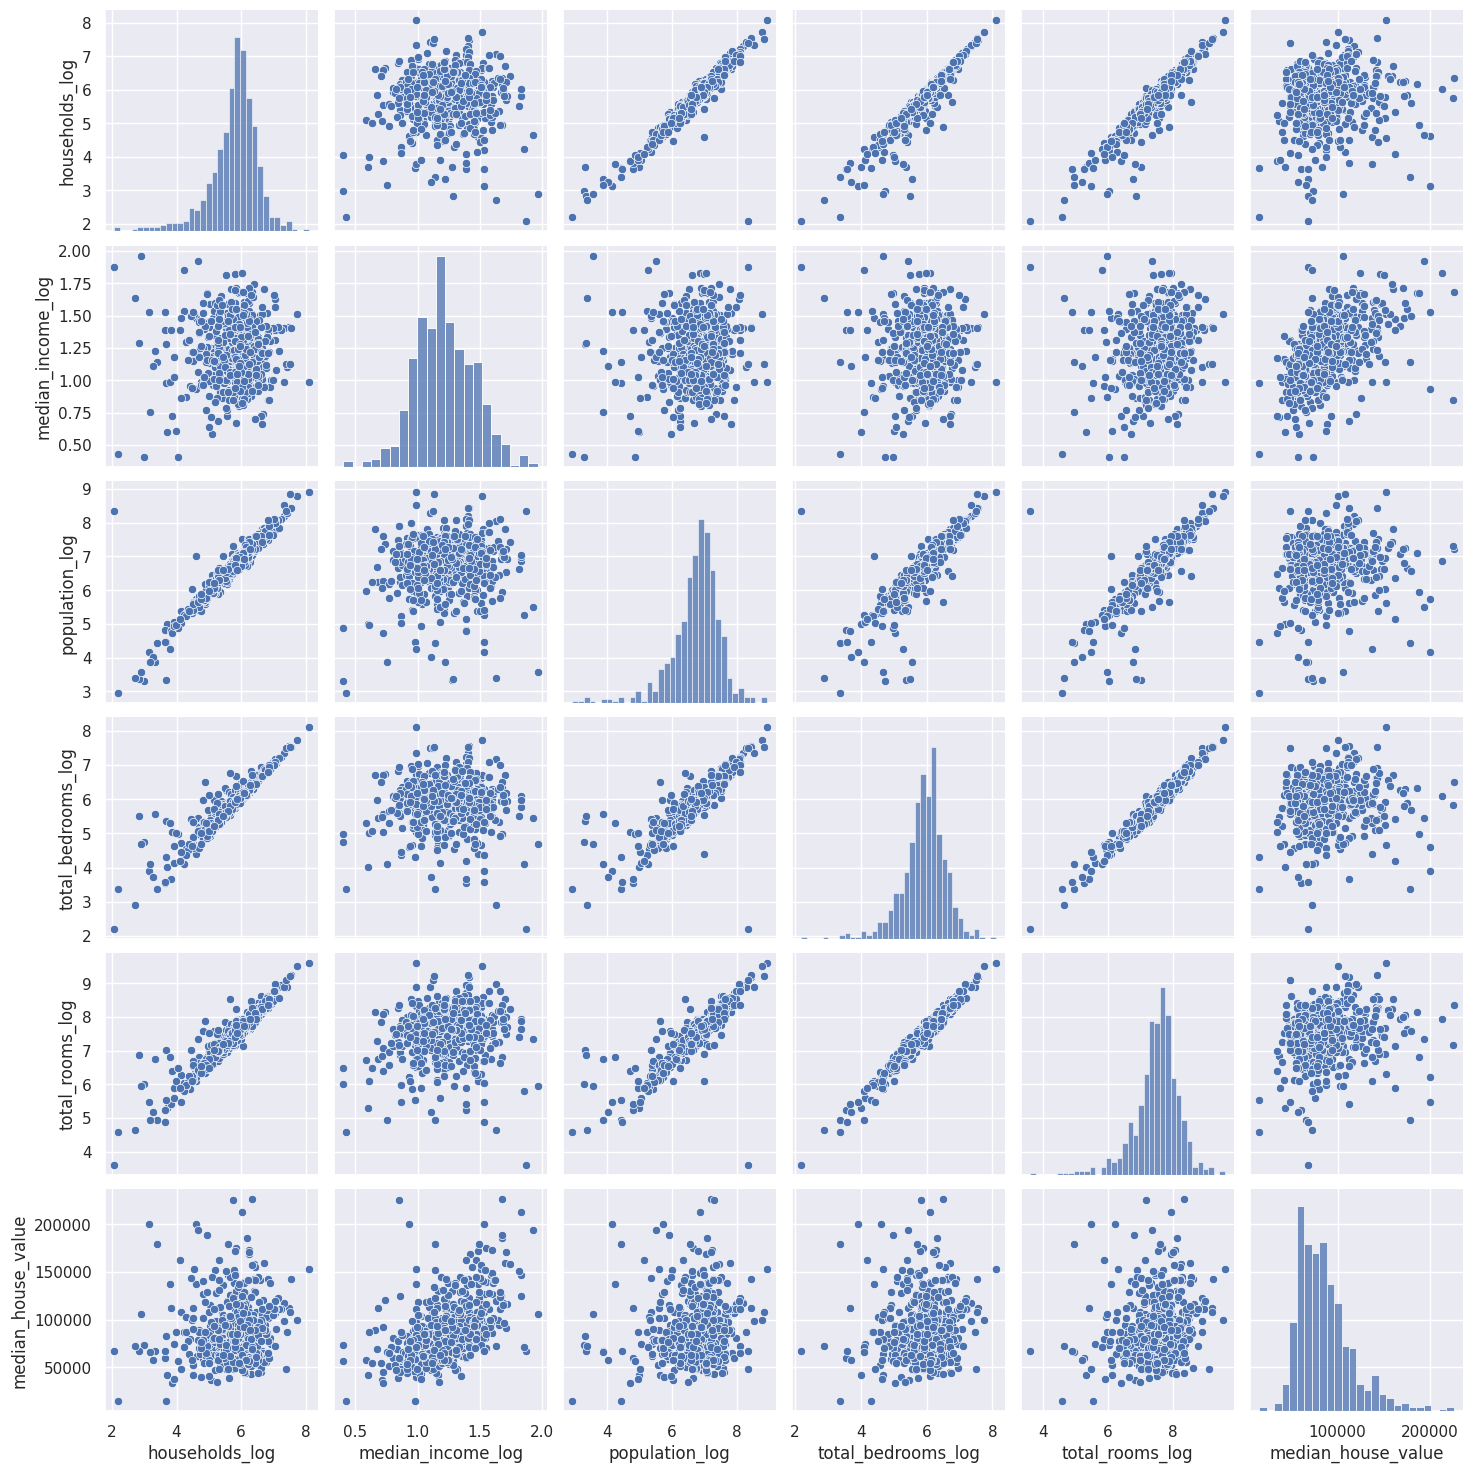

In [ ]:
# Параметры и данные
sns.set()
local_coord = [-122, 41]  # точка, относительно которой определяем порог дистанции
euc_dist_th = 2  # порог расстояния

# Вычисляем евклидово расстояние
euclid_distance = df[['latitude', 'longitude']].apply(
    lambda x: np.sqrt((x['longitude'] - local_coord[0]) ** 2 + (x['latitude'] - local_coord[1]) ** 2), axis=1
)

# Определяем, входит ли точка в порог
indicator = pd.Series(euclid_distance <= euc_dist_th, name='indicator')

print("Data points within threshold:", sum(indicator))

# Визуализация региона
# Заменяем аргументы для lmplot
sns.lmplot(
    x='longitude', y='latitude', data=pd.concat([df, indicator], axis=1),
    hue='indicator', scatter_kws={'marker': '.'}, fit_reg=False, height=5
)

# pairplot
sns.pairplot(df[log_numerical_features+['median_house_value']][indicator])

Мы видим, что на любой локальной территории (вы можете поиграть с параметрами local_coord и euc_dist_th) линейные зависимости между переменными становятся сильнее.

Таким образом, координаты являются очень важным фактором для нашей задачи!

### Визуализация зависимости таргета от координат

<Figure size 1000x1000 with 0 Axes>

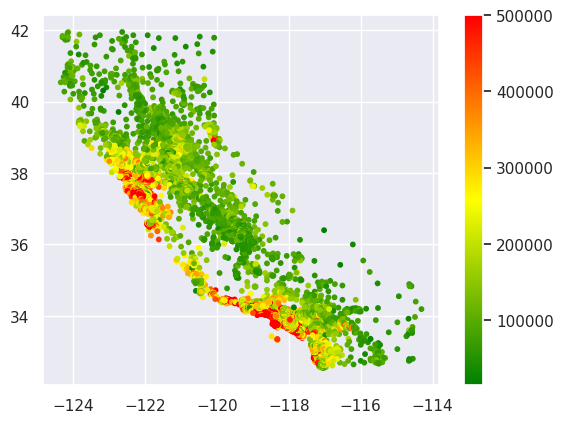

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))

cmap = LinearSegmentedColormap.from_list(name='name', colors=['green','yellow','red'])

f, ax = plt.subplots()
points = ax.scatter(df['longitude'], df['latitude'], c=df['median_house_value'],
                    s=10, cmap=cmap)
f.colorbar(points)

Можно заметить, что самые дорогие дома находятся рядом с Сан-Франциско (37.7749° N, 122.4194° W) и Лос-Анджелесом (34.0522° N, 118.2437° W). На основе этого можно использовать расстояние до этих городов в качестве дополнительных признаков.

Мы также видим, что самые дорогие дома расположены приблизительно на прямой линии и становятся дешевле по мере перемещения на северо-восток. Это означает, что линейная комбинация самих координат может быть полезным признаком.

In [ ]:
sf_coord=[-122.4194, 37.7749]
la_coord=[-118.2437, 34.0522]

df['distance_to_SF']=np.sqrt((df['longitude']-sf_coord[0])**2+(df['latitude']-sf_coord[1])**2)

df['distance_to_LA']=np.sqrt((df['longitude']-la_coord[0])**2+(df['latitude']-la_coord[1])**2)

In [ ]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  households_log  median_income_log  population_log  \
0            NEAR BAY        4.844187           2.232720        5.777652   
1            NEAR BAY        7.037906           2.230165        7.784057   
2            NEAR BAY        5.181784           2.111110        6.208590   
3            NEAR BAY        5.393628           1.893579        6.326149   
4            NEAR BAY        5.560682           1.578195        6.338594   
...               ...             ...                ...             ...   
20635          INLAND        5.802118           0.940124        6.740519   
20636          INLAND        4.744932           1.268861        5.877736   
20637          INLAND        6.073045           0.993252        6.915723   
20638          INLAND        5.857933           1.053336        6.609349   
20639          INLAND        6.274762           1.220417        7.235619   

       total_bedrooms_log  total_rooms_log  distance_to_SF  distance_to_LA  
0                4.867534         6.781058        0.216606        5.526540  
1                7.009409         8.867850        0.216800        5.505479  
2                5.252273         7.291656        0.194485        5.513048  
3                5.463832         7.150701        0.185301        5.520301  
4                5.638355         7.395108        0.185301        5.520301  
...                   ...              ...             ...             ...  
20635            5.926926         7.418181        2.162099        6.128820  
20636            5.017280         6.548219        2.098622        6.194240  
20637            6.186209         7.720905        2.043995        6.146470  
20638            6.016157         7.528869        1.986967        6.195511  
20639            6.424869         7.932362        1.983766        6.103836  

[20640 rows x 17 columns]

In [ ]:
df.isna().sum().sum()

414

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.dropna()

In [ ]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  households_log  median_income_log  population_log  \
0            NEAR BAY        4.844187           2.232720        5.777652   
1            NEAR BAY        7.037906           2.230165        7.784057   
2            NEAR BAY        5.181784           2.111110        6.208590   
3            NEAR BAY        5.393628           1.893579        6.326149   
4            NEAR BAY        5.560682           1.578195        6.338594   
...               ...             ...                ...             ...   
20635          INLAND        5.802118           0.940124        6.740519   
20636          INLAND        4.744932           1.268861        5.877736   
20637          INLAND        6.073045           0.993252        6.915723   
20638          INLAND        5.857933           1.053336        6.609349   
20639          INLAND        6.274762           1.220417        7.235619   

       total_bedrooms_log  total_rooms_log  distance_to_SF  distance_to_LA  
0                4.867534         6.781058        0.216606        5.526540  
1                7.009409         8.867850        0.216800        5.505479  
2                5.252273         7.291656        0.194485        5.513048  
3                5.463832         7.150701        0.185301        5.520301  
4                5.638355         7.395108        0.185301        5.520301  
...                   ...              ...             ...             ...  
20635            5.926926         7.418181        2.162099        6.128820  
20636            5.017280         6.548219        2.098622        6.194240  
20637            6.186209         7.720905        2.043995        6.146470  
20638            6.016157         7.528869        1.986967        6.195511  
20639            6.424869         7.932362        1.983766        6.103836  

[20433 rows x 17 columns]

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

In [ ]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity  households_log  median_income_log  population_log  \
0                    3        4.844187           2.232720        5.777652   
1                    3        7.037906           2.230165        7.784057   
2                    3        5.181784           2.111110        6.208590   
3                    3        5.393628           1.893579        6.326149   
4                    3        5.560682           1.578195        6.338594   
...                ...             ...                ...             ...   
20635                1        5.802118           0.940124        6.740519   
20636                1        4.744932           1.268861        5.877736   
20637                1        6.073045           0.993252        6.915723   
20638                1        5.857933           1.053336        6.609349   
20639                1        6.274762           1.220417        7.235619   

       total_bedrooms_log  total_rooms_log  distance_to_SF  distance_to_LA  
0                4.867534         6.781058        0.216606        5.526540  
1                7.009409         8.867850        0.216800        5.505479  
2                5.252273         7.291656        0.194485        5.513048  
3                5.463832         7.150701        0.185301        5.520301  
4                5.638355         7.395108        0.185301        5.520301  
...                   ...              ...             ...             ...  
20635            5.926926         7.418181        2.162099        6.128820  
20636            5.017280         6.548219        2.098622        6.194240  
20637            6.186209         7.720905        2.043995        6.146470  
20638            6.016157         7.528869        1.986967        6.195511  
20639            6.424869         7.932362        1.983766        6.103836  

[20433 rows x 17 columns]

In [ ]:
set(df['ocean_proximity'])

{0, 1, 2, 3, 4}

In [ ]:
X = df.drop('ocean_proximity',axis = 1)
y = df['ocean_proximity']

In [ ]:
X

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       households_log  median_income_log  population_log  total_bedrooms_log  \
0            4.844187           2.232720        5.777652            4.867534   
1            7.037906           2.230165        7.784057            7.009409   
2            5.181784           2.111110        6.208590            5.252273   
3            5.393628           1.893579        6.326149            5.463832   
4            5.560682           1.578195        6.338594            5.638355   
...               ...                ...             ...                 ...   
20635        5.802118           0.940124        6.740519            5.926926   
20636        4.744932           1.268861        5.877736            5.017280   
20637        6.073045           0.993252        6.915723            6.186209   
20638        5.857933           1.053336        6.609349            6.016157   
20639        6.274762           1.220417        7.235619            6.424869   

       total_rooms_log  distance_to_SF  distance_to_LA  
0             6.781058        0.216606        5.526540  
1             8.867850        0.216800        5.505479  
2             7.291656        0.194485        5.513048  
3             7.150701        0.185301        5.520301  
4             7.395108        0.185301        5.520301  
...                ...             ...             ...  
20635         7.418181        2.162099        6.128820  
20636         6.548219        2.098622        6.194240  
20637         7.720905        2.043995        6.146470  
20638         7.528869        1.986967        6.195511  
20639         7.932362        1.983766        6.103836  

[20433 rows x 16 columns]

In [ ]:
y

0        3
1        3
2        3
3        3
4        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: ocean_proximity, Length: 20433, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
%pip install catboost

  Using cached catboost-1.2.7-cp310-cp310-manylinux2014_x86_64.whl.metadata (1.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 14.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool
clf = CatBoostClassifier(iterations=10000,
                           eval_metric='TotalF1',
                           depth=10,
                           od_wait=500,
                           use_best_model=True,
                           task_type='GPU'
                           )

clf.fit(X_train,y_train,eval_set=(X_test,y_test), verbose=200)

Learning rate set to 0.050978
0:	learn: 0.8729751	test: 0.8686162	best: 0.8686162 (0)	total: 24.5ms	remaining: 4m 5s
200:	learn: 0.9771505	test: 0.9665440	best: 0.9668095 (195)	total: 3.62s	remaining: 2m 56s


KeyboardInterrupt: 

#LSTM


In [ ]:
X_train_array = X_train.to_numpy()
X_val_array = X_test.to_numpy()

# Изменяем размерность
X_train_gip = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))
X_val_gip = X_val_array.reshape((X_val_array.shape[0], 1, X_val_array.shape[1]))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Bidirectional,Dropout
# Иницилизируем модель
model_gip = Sequential()
# Первый двухнаправленный LSTM слой с Dropout
model_gip.add(Bidirectional(LSTM(256, activation='tanh', return_sequences=True, input_shape=(X_train_gip.shape[1], X_train_gip.shape[2]))))
model_gip.add(Dropout(0.2))
# Второй двухнаправленный LSTM слой
model_gip.add(Bidirectional(LSTM(128, activation='tanh')))
model_gip.add(Dropout(0.2))
# Полносвязный слой
model_gip.add(Dense(50, activation='relu'))
# Выходной слой
model_gip.add(Dense(1))
model_gip.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
callbacks_gip = [
    keras.callbacks.ModelCheckpoint(
        filepath='gip_model.keras',
        # Путь по которому нужно сохранить модель
        # Два параметра ниже значат что мы перезапишем
        # текущий чекпоинт в том и только в том случае, когда
        # улучится значение `val_loss`.
        save_best_only=True,
        monitor='val_loss',
        verbose=100)
]

In [ ]:

history = model_gip.fit(
    X_train_gip, y_train,
    epochs=100,
    batch_size=256,
    callbacks=callbacks_gip,
    validation_data=(X_val_gip, y_test)
)

Epoch 1/100
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2388
Epoch 1: val_loss improved from inf to 2.02539, saving model to gip_model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 2.2268 - val_loss: 2.0254
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0068
Epoch 2: val_loss did not improve from 2.02539
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.0071 - val_loss: 2.0372
Epoch 3/100
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0342
Epoch 3: val_loss improved from 2.02539 to 2.01749, saving model to gip_model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0337 - val_loss: 2.0175
Epoch 4/100
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0285
Epoch 4: val_loss did not improve from 2.01749
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.0283 - val_loss: 2.0210
Epoch 5/100
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0496
Epoch 5: val_loss did not improve from 2.01749
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.0477 - val_loss: 2.027

In [ ]:
best_val_loss = min(history.history['val_loss'])
print(f"Лучшее значение val_loss: {best_val_loss}")

Лучшее значение val_loss: 2.017096996307373


In [ ]:
X_pred = X_test.values
X_pred = X_pred.reshape((X_pred.shape[0], 1, X_pred.shape[1]))

In [ ]:
predictions = model_gip.predict(X_pred)

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

#VotingClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier
vot = VotingClassifier(
    estimators=[
        ('catboost', CatBoostClassifier(iterations=10000,
                           eval_metric='TotalF1',
                           depth=10,
                           od_wait=500,
                           task_type='GPU'
                           )),
        ('catboost2', CatBoostClassifier(iterations=10000,
                           eval_metric='TotalF1',
                           depth=16,
                           od_wait=500,
                           task_type='CPU'
                           )),
        ('catboost3', CatBoostClassifier(iterations=10000,
                           eval_metric='TotalF1',
                           depth=16,
                           od_wait=1000,
                           task_type='CPU'
                           )),
                ('catboost4', CatBoostClassifier(iterations=10000,
                           eval_metric='TotalF1',
                           depth=10,
                           learning_rate = 3e-4,
                           od_wait=500,
                           task_type='CPU'
                           )),
        ('catboost5', CatBoostClassifier(iterations=10000,
                           eval_metric='TotalF1',
                           depth=10,
                           learning_rate = 0.001,
                           od_wait=500,
                           task_type='CPU'
                           ))
    ],
    voting='hard',
    n_jobs=-1,
    verbose=True
)
vot.fit(X_train, y_train)


KeyboardInterrupt: 

#Пробуеем БоксКокс и другое временные   ряды



In [2]:
%pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 11.1 MB/s eta 0:00:00


In [48]:
from platform import python_version
import torch
import matplotlib

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import tqdm
import sklearn
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

from arch import arch_model

In [4]:
!wget !wget https://raw.githubusercontent.com/lteplova/tsml/main/Series/weekly-closings-of-the-dowjones-.csv

--2024-11-09 06:35:30--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2024-11-09 06:35:30--  https://raw.githubusercontent.com/lteplova/tsml/main/Series/weekly-closings-of-the-dowjones-.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2942 (2.9K) [text/plain]
Saving to: ‘weekly-closings-of-the-dowjones-.csv’

weekly-closings-of- 100%[===================>]   2.87K  --.-KB/s    in 0s      

2024-11-09 06:35:30 (42.0 MB/s) - ‘weekly-closings-of-the-dowjones-.csv’ saved [2942/2942]

FINISHED --2024-11-09 06:35:30--
Total wall clock time: 0.2s
Downloaded: 1 files, 2.9K in 0s (42.0 MB/s)


In [33]:
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")['Close']

In [34]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [35]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)

        plt.tight_layout()
    return

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


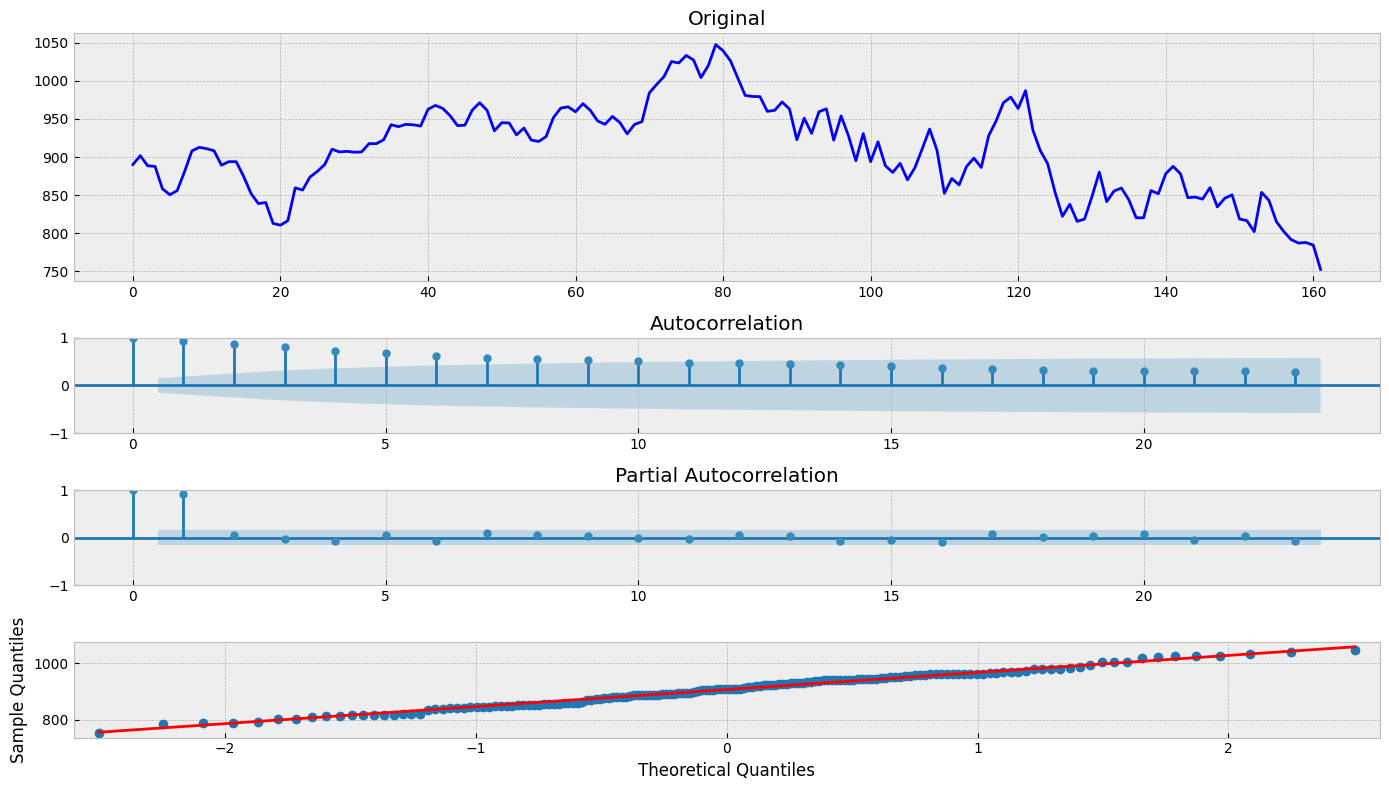

In [36]:
series = dowjones_closing
tsplot(series)


Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


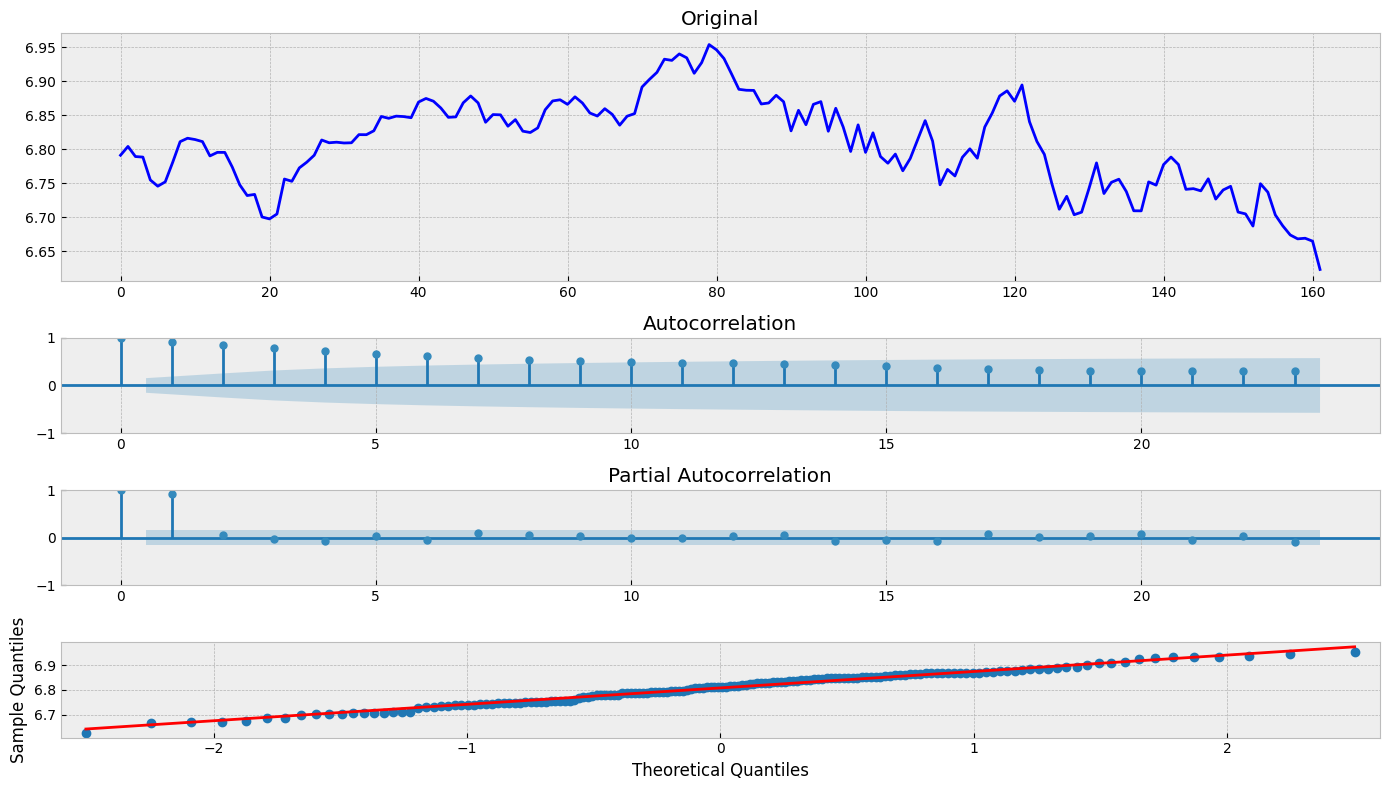

In [37]:
series = boxcox(series, 0)
tsplot(series)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


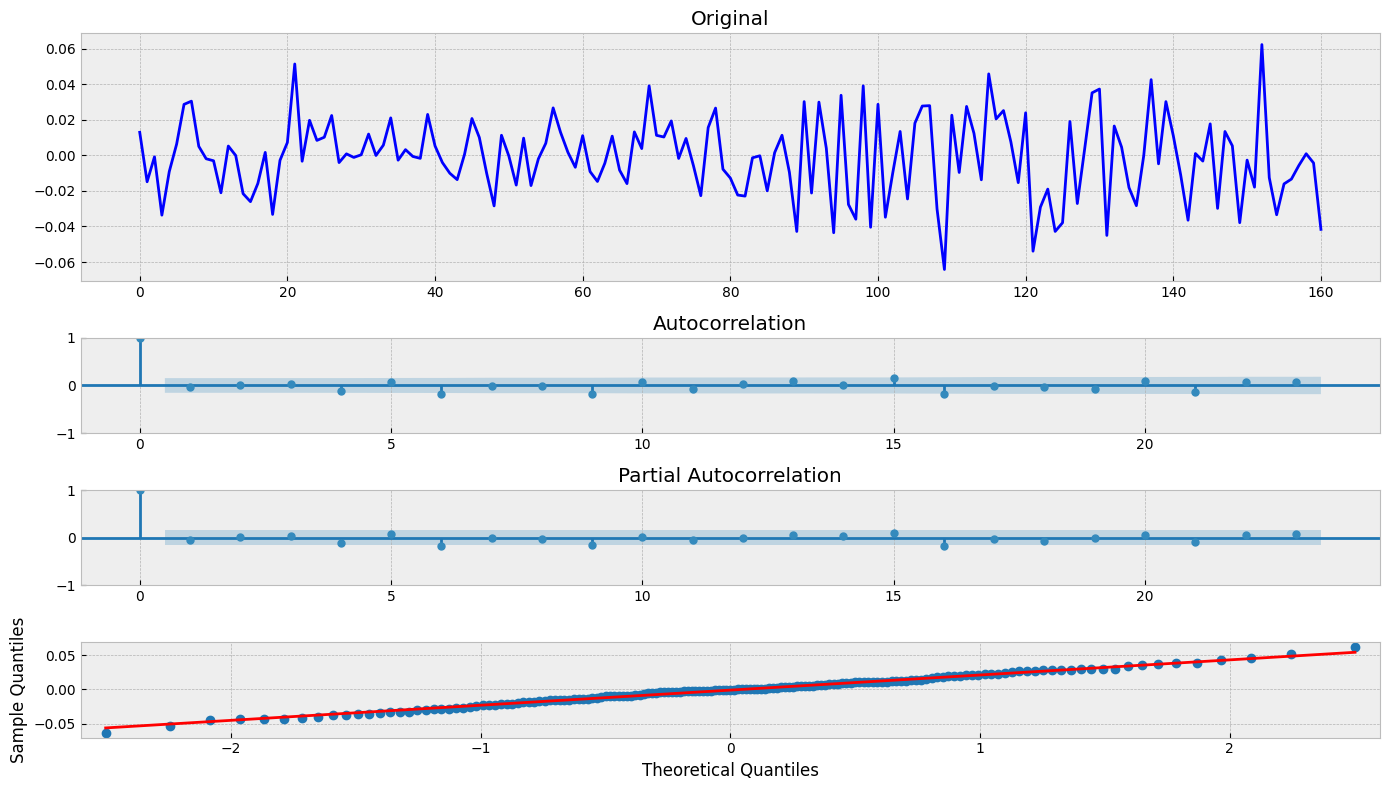

In [38]:
series = series[1:] - series[:-1]
tsplot(series)

In [60]:
am = arch_model(series, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
print(res.summary())

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                392.782
Distribution:      Standardized Student's t   AIC:                          -775.565
Method:                  Maximum Likelihood   BIC:                          -760.158
                                              No. Observations:                  161
Date:                      Sat, Nov 09 2024   Df Residuals:                      160
Time:                              06:57:09   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
m

In [62]:
series

array([ 1.29578429e-02, -1.48468635e-02, -8.21937906e-04, -3.36188251e-02,
       -9.15140029e-03,  6.34000120e-03,  2.86617237e-02,  3.04540991e-02,
        5.05245734e-03, -1.91912328e-03, -3.05625726e-03, -2.10407589e-02,
        5.23752242e-03, -7.83045937e-05, -2.15526559e-02, -2.60317382e-02,
       -1.58099984e-02,  1.65536334e-03, -3.32087637e-02, -2.79623983e-03,
        7.22708127e-03,  5.13673839e-02, -3.30937063e-03,  1.97053558e-02,
        8.39905335e-03,  1.01955867e-02,  2.24049537e-02, -4.06153388e-03,
        8.37871855e-04, -1.16880409e-03,  3.30932239e-04,  1.19610914e-02,
       -7.62897047e-05,  5.72731160e-03,  2.10599564e-02, -2.72007818e-03,
        3.19745326e-03, -6.36550765e-04, -1.67819135e-03,  2.30136779e-02,
        5.30483237e-03, -4.05898503e-03, -1.00419516e-02, -1.36543221e-02,
        6.37260651e-04,  2.07113746e-02,  1.00477359e-02, -1.02037478e-02,
       -2.84220330e-02,  1.12902966e-02, -3.91586194e-04, -1.67158003e-02,
        9.67288176e-03, -

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


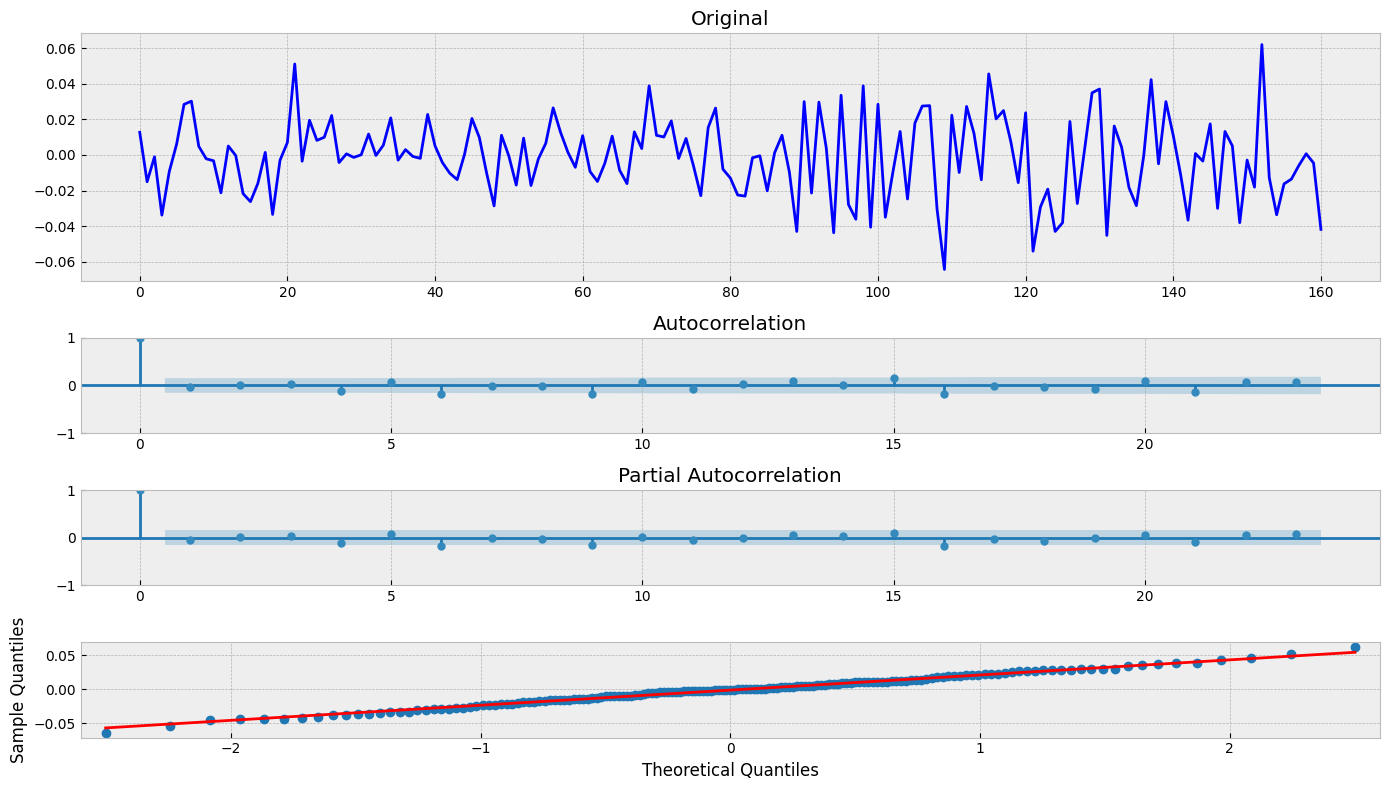

In [63]:
tsplot(res.resid)

In [64]:

am = arch_model(series*100,dist='StudentsT')
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     40,   Neg. LLF: 364.37462883639097
Iteration:     10,   Func. Count:     72,   Neg. LLF: 349.1230573081359
Iteration:     15,   Func. Count:    102,   Neg. LLF: 348.7224045124931
Iteration:     20,   Func. Count:    132,   Neg. LLF: 348.6545493819525
Optimization terminated successfully    (Exit mode 0)
            Current function value: 348.6523118825946
            Iterations: 20
            Function evaluations: 142
            Gradient evaluations: 20
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -348.652
Distribution:      Standardized Student's t   AIC:                           707.305
Method:                  Maximum Likelihood   BIC:                          

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


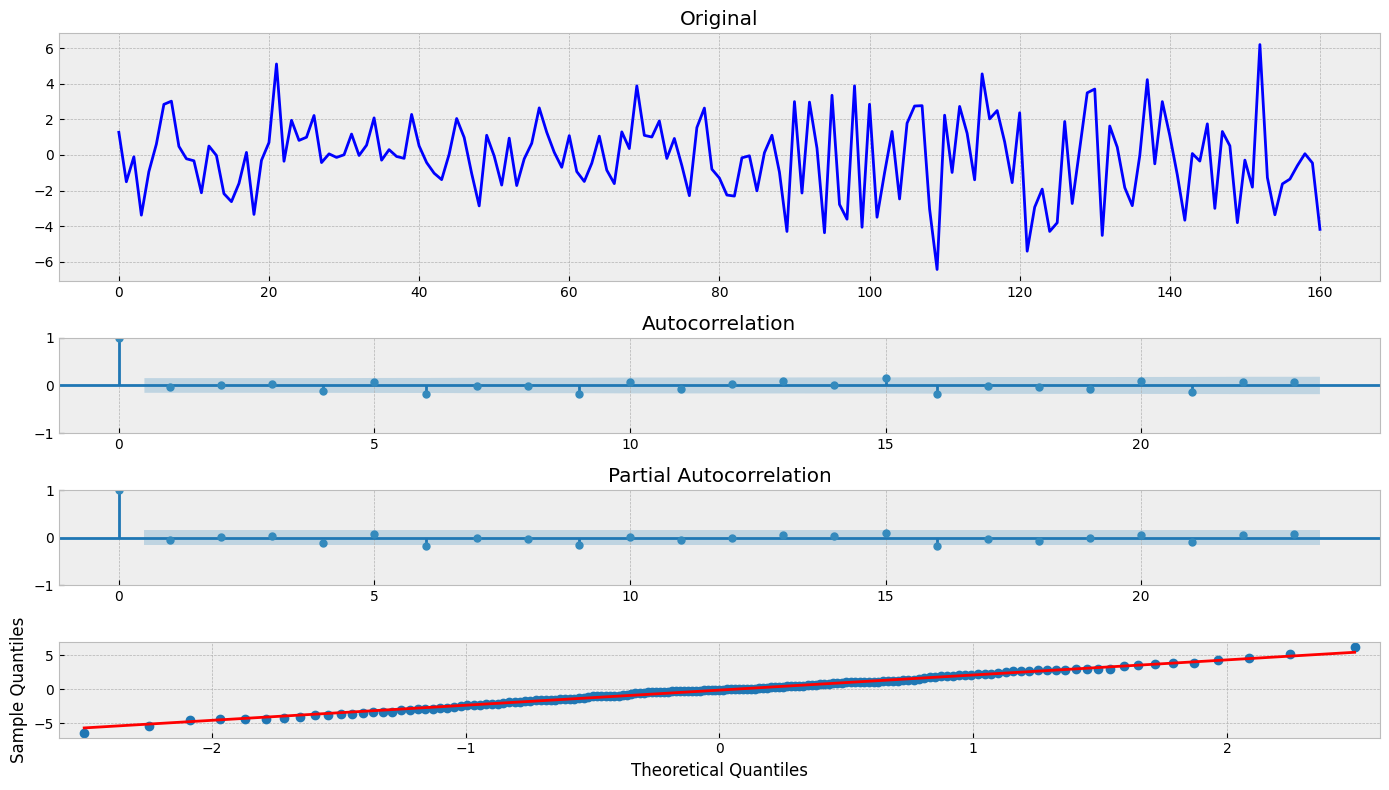

In [65]:
tsplot(res.resid)

In [66]:

forecast = res.forecast(horizon=100)

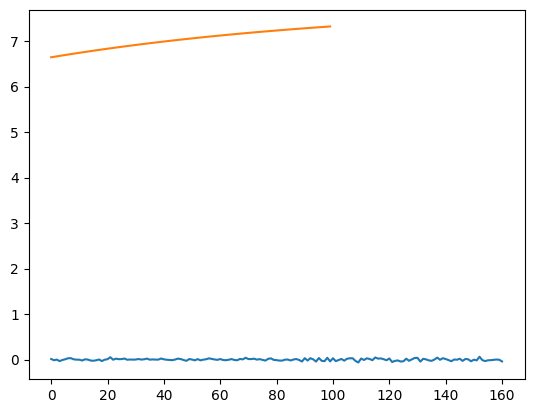

In [67]:
plt.plot(series)
# print(forecast.residual_variance.iloc[-1].values)
plt.plot([0]*100 + forecast.residual_variance.iloc[-1].values)

In [68]:
# res.forecast()
from statsmodels.graphics.tsaplots import plot_predict

In [71]:
series = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
s = pd.DataFrame(series['Close'])

s.columns = ['curr_value']
print(s)
window = 10
for i in range(1, window + 1):
    s.loc[:, f'prev_val_{i}'] = s['curr_value'].shift(i)

s.dropna(inplace=True)
s.head(5)

     curr_value
0        890.19
1        901.80
2        888.51
3        887.78
4        858.43
..          ...
157      791.77
158      787.23
159      787.94
160      784.57
161      752.58

[162 rows x 1 columns]


curr_value  prev_val_1  prev_val_2  prev_val_3  prev_val_4  prev_val_5  \
10      911.00      912.75      908.15      880.91      856.02      850.61   
11      908.22      911.00      912.75      908.15      880.91      856.02   
12      889.31      908.22      911.00      912.75      908.15      880.91   
13      893.98      889.31      908.22      911.00      912.75      908.15   
14      893.91      893.98      889.31      908.22      911.00      912.75   

    prev_val_6  prev_val_7  prev_val_8  prev_val_9  prev_val_10  
10      858.43      887.78      888.51      901.80       890.19  
11      850.61      858.43      887.78      888.51       901.80  
12      856.02      850.61      858.43      887.78       888.51  
13      880.91      856.02      850.61      858.43       887.78  
14      908.15      880.91      856.02      850.61       858.43

In [72]:
def prepareData(data, lag_start=5, lag_end=20, test_size=0.15):

    data = pd.DataFrame(data.copy())

    # считаем индекс в датафрейме, после которого начинается тестовый отрезок
    test_index = int(len(data)*(1-test_size))

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.Close.shift(i)

    data = data.dropna()
    data = data.reset_index(drop=True)
    data = data.drop(["Week"], axis=1)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop(["Close"], axis=1)
    y_train = data.loc[:test_index]["Close"]
    X_test = data.loc[test_index:].drop(["Close"], axis=1)
    y_test = data.loc[test_index:]["Close"]

    return X_train, X_test, y_train, y_test

In [73]:
X_train, X_test, y_train, y_test = prepareData(series, lag_start=1, lag_end=20, test_size=0.3)

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

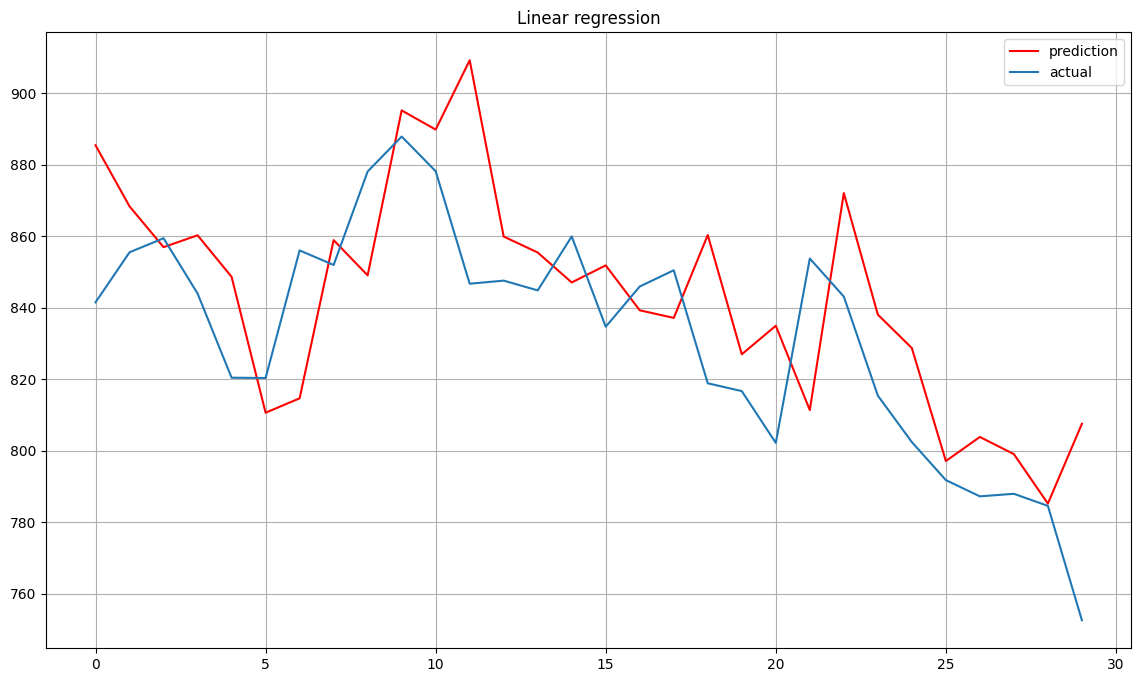

In [76]:
plt.figure(figsize=(14, 8))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression")
plt.grid(True)

In [77]:
X_train

lag_1   lag_2   lag_3   lag_4   lag_5   lag_6   lag_7   lag_8   lag_9  \
0    840.39  839.00  852.37  874.85  893.91  893.98  889.31  908.22  911.00   
1    812.94  840.39  839.00  852.37  874.85  893.91  893.98  889.31  908.22   
2    810.67  812.94  840.39  839.00  852.37  874.85  893.91  893.98  889.31   
3    816.55  810.67  812.94  840.39  839.00  852.37  874.85  893.91  893.98   
4    859.59  816.55  810.67  812.94  840.39  839.00  852.37  874.85  893.91   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
109  838.05  822.25  854.00  891.33  908.42  935.28  987.06  963.73  978.63   
110  815.65  838.05  822.25  854.00  891.33  908.42  935.28  987.06  963.73   
111  818.73  815.65  838.05  822.25  854.00  891.33  908.42  935.28  987.06   
112  848.02  818.73  815.65  838.05  822.25  854.00  891.33  908.42  935.28   
113  880.23  848.02  818.73  815.65  838.05  822.25  854.00  891.33  908.42   

     lag_10  lag_11  lag_12  lag_13  lag_14  lag_15  lag_16  lag_17  lag_18  \
0    912.75  908.15  880.91  856.02  850.61  858.43  887.78  888.51  901.80   
1    911.00  912.75  908.15  880.91  856.02  850.61  858.43  887.78  888.51   
2    908.22  911.00  912.75  908.15  880.91  856.02  850.61  858.43  887.78   
3    889.31  908.22  911.00  912.75  908.15  880.91  856.02  850.61  858.43   
4    893.98  889.31  908.22  911.00  912.75  908.15  880.91  856.02  850.61   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
109  971.25  947.10  927.90  886.36  898.63  887.57  863.49  871.84  852.38   
110  978.63  971.25  947.10  927.90  886.36  898.63  887.57  863.49  871.84   
111  963.73  978.63  971.25  947.10  927.90  886.36  898.63  887.57  863.49   
112  987.06  963.73  978.63  971.25  947.10  927.90  886.36  898.63  887.57   
113  935.28  987.06  963.73  978.63  971.25  947.10  927.90  886.36  898.63   

     lag_19  
0    890.19  
1    901.80  
2    888.51  
3    887.78  
4    858.43  
..      ...  
109  908.87  
110  852.38  
111  871.84  
112  863.49  
113  887.57  

[114 rows x 19 columns]

In [78]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=2, random_state=42)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
# print(classification_report(y_test, predicted))

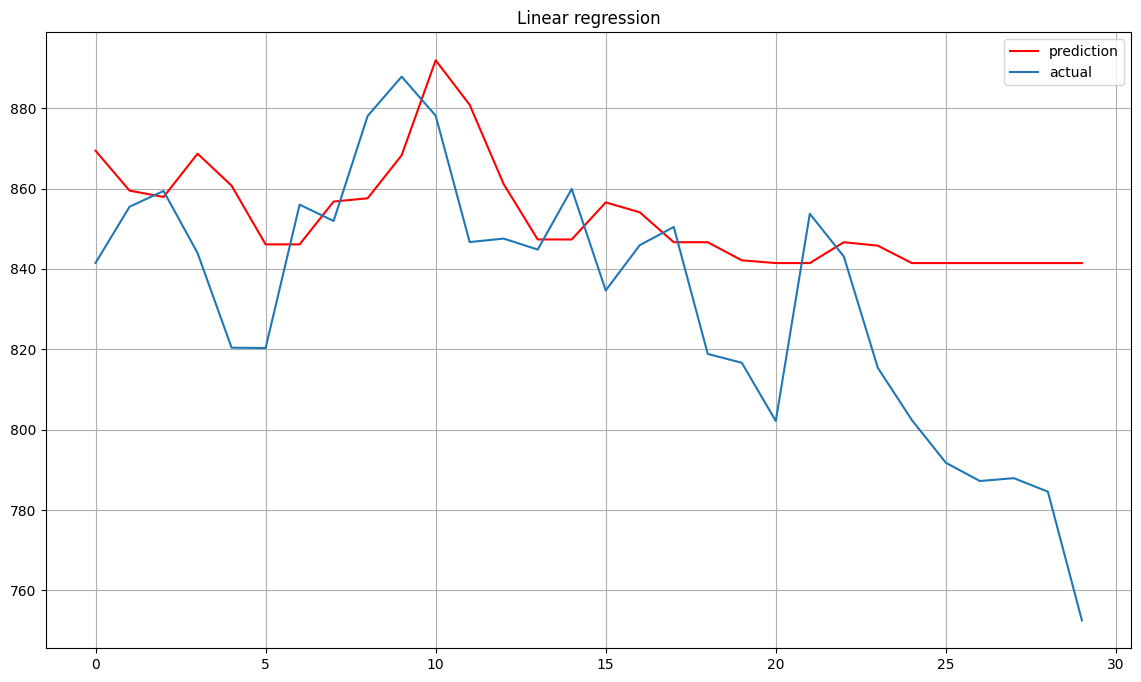

In [79]:
plt.figure(figsize=(14, 8))
plt.plot(predicted, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression")
plt.grid(True);

#lstm временные ряды


In [111]:
def transform_data(arr, seq_len):
    x, y = [], []
    for i in range(len(arr) - seq_len):
        x_i = arr[i : i + seq_len]
        y_i = arr[i + 1 : i + seq_len + 1]
        x.append(x_i)
        y.append(y_i)
    x_arr = np.array(x).reshape(-1, seq_len)
    y_arr = np.array(y).reshape(-1, seq_len)
    x_var = Variable(torch.from_numpy(x_arr).float())
    y_var = Variable(torch.from_numpy(y_arr).float())
    return x_var, y_var

In [112]:
df_train = series.Close[:100].to_frame()
df_val = series.Close[100:130].to_frame()
df_test = series.Close[130:].to_frame()

In [113]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_arr = scaler.fit_transform(df_train)
val_arr = scaler.transform(df_val)
test_arr = scaler.transform(df_test)

In [114]:
# train_arr = series.Close
# train_arr , val_arr, test_arr = series.Close[:100], series.Close[100:130], series.Close[130:]

In [115]:
from torch.autograd import Variable

seq_len = 10

x_train, y_train = transform_data(train_arr, seq_len)
x_val, y_val = transform_data(val_arr, seq_len)
x_test, y_test = transform_data(test_arr, seq_len)

In [116]:
def plot_sequence(axes, i, x_train, y_train):
    axes[i].set_title("%d. Sequence" % (i + 1))
    axes[i].set_xlabel("Time bars")
    axes[i].set_ylabel("Scaled VWAP")
    axes[i].plot(range(seq_len), x_train[i].cpu().numpy(), color="r", label="Feature")
    axes[i].plot(range(1, seq_len + 1), y_train[i].cpu().numpy(), color="b", label="Target")
    axes[i].legend()

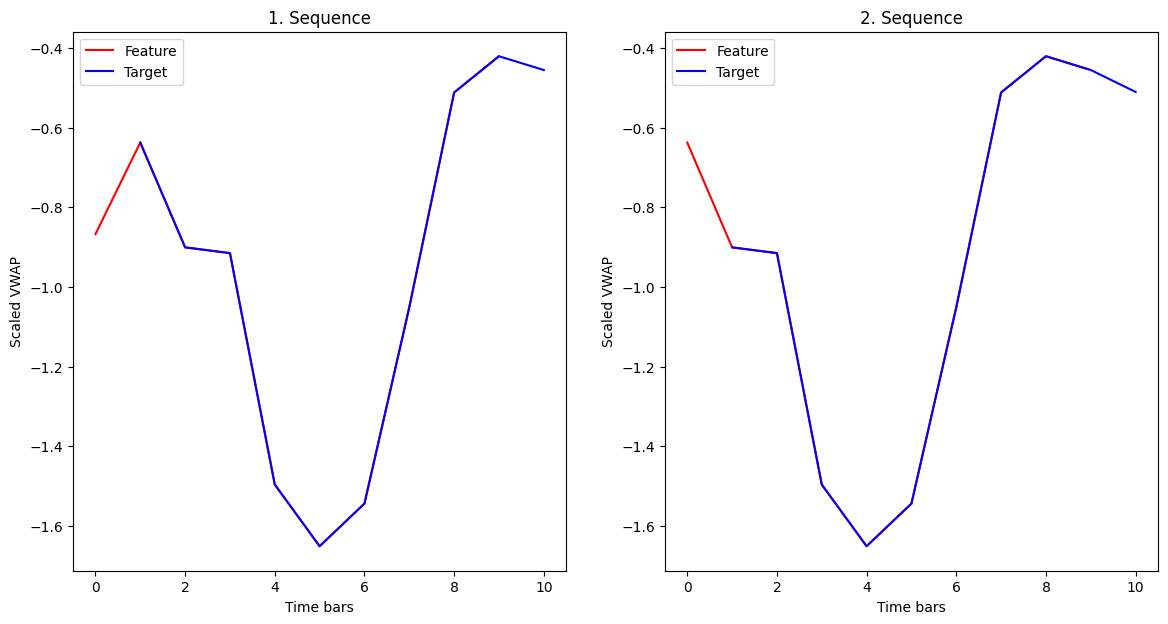

In [117]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
plot_sequence(axes, 0, x_train, y_train)
plot_sequence(axes, 1, x_train, y_train)

In [118]:
import torch.nn as nn
import torch.optim as optim


class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lstm = nn.LSTMCell(self.input_size, self.hidden_size)
        self.linear = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, future=0, y=None):
        outputs = []

        # reset the state of LSTM
        # the state is kept till the end of the sequence
        h_t = torch.zeros(input.size(0), self.hidden_size, dtype=torch.float32)
        c_t = torch.zeros(input.size(0), self.hidden_size, dtype=torch.float32)

        for i, input_t in enumerate(input.chunk(input.size(1), dim=1)):
            h_t, c_t = self.lstm(input_t, (h_t, c_t))
            output = self.linear(h_t)
            outputs += [output]

        for i in range(future):
            if y is not None and random.random() > 0.5:
                output = y[:, [i]]  # teacher forcing
            h_t, c_t = self.lstm(output, (h_t, c_t))
            output = self.linear(h_t)
            outputs += [output]
        outputs = torch.stack(outputs, 1).squeeze(2)
        return outputs

In [125]:
import time
import random


class Optimization:
    """ A helper class to train, test and diagnose the LSTM"""

    def __init__(self, model, loss_fn, optimizer, scheduler):
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.scheduler = scheduler
        self.train_losses = []
        self.val_losses = []
        self.futures = []

    @staticmethod
    def generate_batch_data(x, y, batch_size):
        for batch, i in enumerate(range(0, len(x) - batch_size, batch_size)):
            x_batch = x[i : i + batch_size]
            y_batch = y[i : i + batch_size]
            yield x_batch, y_batch, batch

    def train(
        self,
        x_train,
        y_train,
        x_val=None,
        y_val=None,
        batch_size=5,
        n_epochs=100,
        do_teacher_forcing=None,
    ):
        seq_len = x_train.shape[1]
        for epoch in range(n_epochs):
            start_time = time.time()
            self.futures = []

            train_loss = 0
            for x_batch, y_batch, batch in self.generate_batch_data(x_train, y_train, batch_size):
                y_pred = self._predict(x_batch, y_batch, seq_len, do_teacher_forcing)
                self.optimizer.zero_grad()
                loss = self.loss_fn(y_pred, y_batch)
                loss.backward()
                self.optimizer.step()
                train_loss += loss.item()
            self.scheduler.step()
            train_loss /= batch
            self.train_losses.append(train_loss)

            self._validation(x_val, y_val, batch_size)

            elapsed = time.time() - start_time
            print(
                "Epoch %d Train loss: %.2f. Validation loss: %.2f. Avg future: %.2f. Elapsed time: %.2fs."
                % (epoch + 1, train_loss, self.val_losses[-1], np.average(self.futures), elapsed)
            )

    def _predict(self, x_batch, y_batch, seq_len, do_teacher_forcing):
        if do_teacher_forcing:
            future = random.randint(1, int(seq_len) / 2)
            limit = x_batch.size(1) - future
            y_pred = self.model(x_batch[:, :limit], future=future, y=y_batch[:, limit:])
        else:
            future = 0
            y_pred = self.model(x_batch)
        self.futures.append(future)
        return y_pred

    def _validation(self, x_val, y_val, batch_size):
        if x_val is None or y_val is None:
            return
        with torch.no_grad():
            val_loss = 0
            batch = 1
            for x_batch, y_batch, batch in self.generate_batch_data(x_val, y_val, batch_size):
                y_pred = self.model(x_batch)
                loss = self.loss_fn(y_pred, y_batch)
                val_loss += loss.item()
            val_loss /= batch
            self.val_losses.append(val_loss)

    def evaluate(self, x_test, y_test, batch_size, future=1):
        with torch.no_grad():
            test_loss = 0
            actual, predicted = [], []
            for x_batch, y_batch, batch in self.generate_batch_data(x_test, y_test, batch_size):
                y_pred = self.model(x_batch, future=future)
                y_pred = (
                    y_pred[:, -len(y_batch) :] if y_pred.shape[1] > y_batch.shape[1] else y_pred
                )
                loss = self.loss_fn(y_pred, y_batch)
                test_loss += loss.item()
                actual += torch.squeeze(y_batch[:, -1]).data.cpu().numpy().tolist()
                predicted += torch.squeeze(y_pred[:, -1]).data.cpu().numpy().tolist()
            test_loss /= batch
            return actual, predicted, test_loss

    def plot_losses(self):
        plt.plot(self.train_losses, label="Training loss")
        plt.plot(self.val_losses, label="Validation loss")
        plt.legend()
        plt.title("Losses")

In [126]:
def generate_sequence(scaler, model, x_sample, future=1000):
    """ Generate future values for x_sample with the model """
    y_pred_tensor = model(x_sample, future=future)
    y_pred = y_pred_tensor.cpu().tolist()
    y_pred = scaler.inverse_transform(y_pred)
    return y_pred

In [127]:
def to_dataframe(actual, predicted):
    return pd.DataFrame({"actual": actual, "predicted": predicted})


def inverse_transform(scalar, df, columns):
    for col in columns:
        df[col] = scaler.inverse_transform(df[col])
    return df

In [131]:
model_1 = Model(input_size=1, hidden_size=21, output_size=1)
loss_fn_1 = nn.MSELoss()
optimizer_1 = optim.Adam(model_1.parameters(), lr=1e-3)
scheduler_1 = optim.lr_scheduler.StepLR(optimizer_1, step_size=5, gamma=0.1)
optimization_1 = Optimization(model_1, loss_fn_1, optimizer_1, scheduler_1)

In [132]:
optimization_1.train(x_train, y_train, x_val, y_val, do_teacher_forcing=False)

Epoch 1 Train loss: 1.24. Validation loss: 1.09. Avg future: 0.00. Elapsed time: 0.13s.
Epoch 2 Train loss: 1.14. Validation loss: 1.05. Avg future: 0.00. Elapsed time: 0.12s.
Epoch 3 Train loss: 1.05. Validation loss: 1.01. Avg future: 0.00. Elapsed time: 0.17s.
Epoch 4 Train loss: 0.96. Validation loss: 0.96. Avg future: 0.00. Elapsed time: 0.13s.
Epoch 5 Train loss: 0.87. Validation loss: 0.91. Avg future: 0.00. Elapsed time: 0.14s.
Epoch 6 Train loss: 0.82. Validation loss: 0.91. Avg future: 0.00. Elapsed time: 0.13s.
Epoch 7 Train loss: 0.81. Validation loss: 0.91. Avg future: 0.00. Elapsed time: 0.14s.
Epoch 8 Train loss: 0.80. Validation loss: 0.90. Avg future: 0.00. Elapsed time: 0.12s.
Epoch 9 Train loss: 0.79. Validation loss: 0.90. Avg future: 0.00. Elapsed time: 0.14s.
Epoch 10 Train loss: 0.78. Validation loss: 0.89. Avg future: 0.00. Elapsed time: 0.13s.
Epoch 11 Train loss: 0.77. Validation loss: 0.89. Avg future: 0.00. Elapsed time: 0.15s.
Epoch 12 Train loss: 0.77. Val

Test loss 2.7223


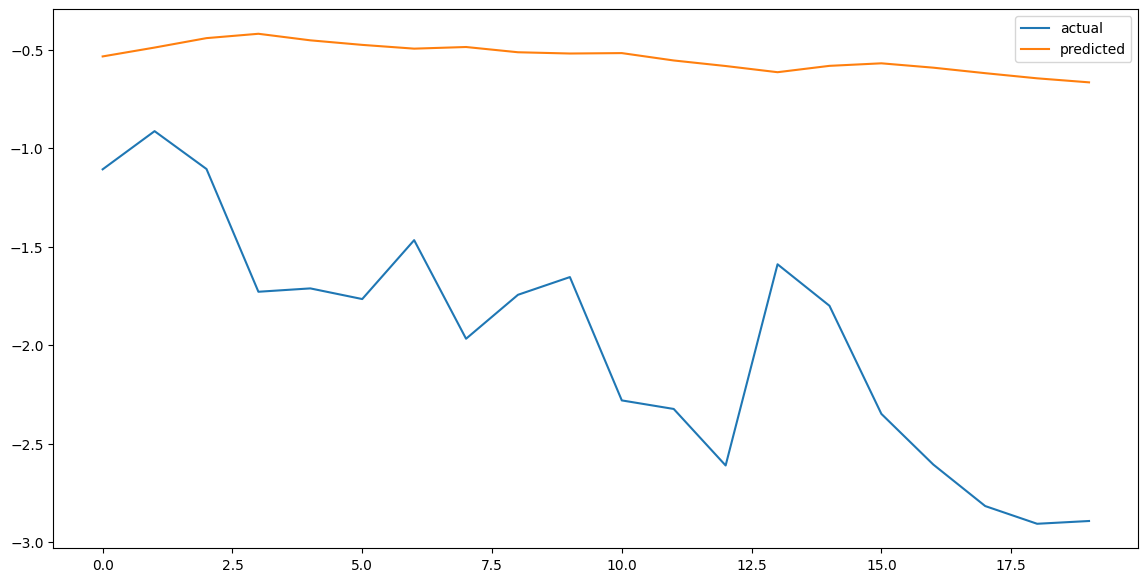

In [133]:
actual_1, predicted_1, test_loss_1 = optimization_1.evaluate(x_test, y_test, future=0, batch_size=5)

df_result_1 = to_dataframe(actual_1, predicted_1)
df_result_1.plot(figsize=(14, 7))
print("Test loss %.4f" % test_loss_1)

Test loss 2.7223


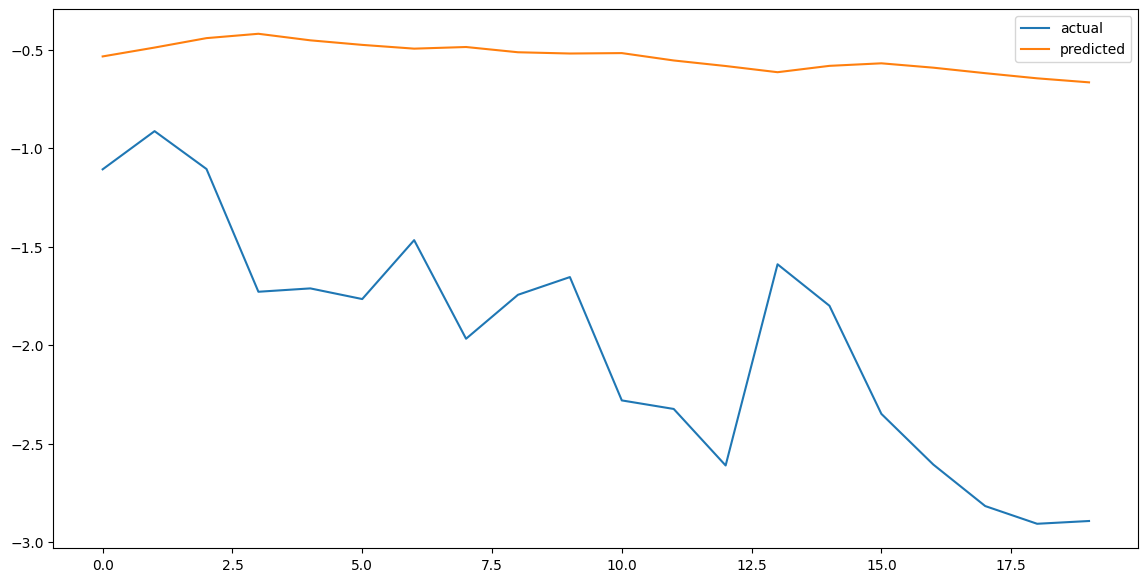

In [134]:
actual_1, predicted_1, test_loss_1 = optimization_1.evaluate(x_test, y_test, future=0, batch_size=5)

df_result_1 = to_dataframe(actual_1, predicted_1)
df_result_1.plot(figsize=(14, 7))
print("Test loss %.4f" % test_loss_1)